In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
import xgboost
warnings.filterwarnings('ignore')



In [20]:
df = pd.read_csv('Data\crop_yield.csv')

In [21]:
df.describe()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372

Data Preprocessing


In [22]:
#Initializing Functions

#Unique Value and Value Counts
def unique_value_count(df):
    for i in df:
        print('_'*24)
        print(df[i].value_counts())
        print(df[i].unique())
        print('='*24)
        print('')

#Null Values and Percentage
def Na(df):
    for i in df:
            print('_'*24)
            nan = df[i].isnull().sum()
            print(nan,f"- Null Values of {i}")
            print(f'The Null Percentage of {i} is {(nan/len(df))*100:.2f}%')
            print('='*24)
            print('')

#Ordinal Encoder Function
from sklearn.preprocessing import OrdinalEncoder
def OD_Encoder(df,column,category):
    ord_encoder = OrdinalEncoder(categories=[category])
    df[column] = ord_encoder.fit_transform(df[[column]])
    return df      
#OHE Encoder Function
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output= False).set_output(transform='pandas')    
def OHE_Encoder(df,col):  
    encoded = oh_encoder.fit_transform(df_copy[[Col]])
    df_copy = pd.concat([df_copy,encoded],axis=1)
    
   



In [23]:
df_copy = df.copy() #Making a Temp Copy of Original DF

In [24]:
df_copy.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.248251

In [25]:
unique_value_count(df_copy)

________________________
Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64
['West' 'South' 'North' 'East']

________________________
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64
['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']

________________________
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64
['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']

________________________
Rainfall_mm
705.324834    1
120.110365    1
771.012584    1
175.388866    1
315.605610    1
             ..
730.379174    1
986.866331    1
147.998025    1
992.673282    1
897.077239    1
Name: count, Length: 1000000, dtype: int64
[897.07723911 992.67328162 147.99802529 ... 867.36204622 492.81285654
 180.93618014]

________________________
Temperature_Celsius
18.670699    1
35.447949    

In [26]:
Na(df_copy) #Data is Clean contains no Null Values

________________________
0 - Null Values of Region
The Null Percentage of Region is 0.00%

________________________
0 - Null Values of Soil_Type
The Null Percentage of Soil_Type is 0.00%

________________________
0 - Null Values of Crop
The Null Percentage of Crop is 0.00%

________________________
0 - Null Values of Rainfall_mm
The Null Percentage of Rainfall_mm is 0.00%

________________________
0 - Null Values of Temperature_Celsius
The Null Percentage of Temperature_Celsius is 0.00%

________________________
0 - Null Values of Fertilizer_Used
The Null Percentage of Fertilizer_Used is 0.00%

________________________
0 - Null Values of Irrigation_Used
The Null Percentage of Irrigation_Used is 0.00%

________________________
0 - Null Values of Weather_Condition
The Null Percentage of Weather_Condition is 0.00%

________________________
0 - Null Values of Days_to_Harvest
The Null Percentage of Days_to_Harvest is 0.00%

________________________
0 - Null Values of Yield_tons_per_hectare


In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [28]:
df_copy.describe()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372

Feature Engineering

Data Encoding

In [29]:
#Data Encoding Regions Using OHE

encoded = oh_encoder.fit_transform(df_copy[['Region']])
df_copy = pd.concat([df_copy,encoded],axis=1)
   

In [30]:
#Data Encoding Soil Types Using OHE

encoded = oh_encoder.fit_transform(df_copy[['Soil_Type']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [31]:
#Data Encoding Crops Using OHE

encoded = oh_encoder.fit_transform(df_copy[['Crop']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [32]:
#Data Encoding Weather Condition Using OHE

encoded = oh_encoder.fit_transform(df_copy[['Weather_Condition']])
df_copy = pd.concat([df_copy,encoded],axis=1)

In [33]:
#Converting -ve Value to +ve
df_copy['Yield_tons_per_hectare'] = df_copy['Yield_tons_per_hectare'].abs()

Feature Extraction

In [34]:
df_copy['Irrigation_Fertilization_Used'] = np.where( (df_copy['Fertilizer_Used']==True) & (df_copy['Irrigation_Used'] == True), True, False)
df_copy['Irrigation_Fertilization_Both_Not_Used'] = np.where((df_copy['Fertilizer_Used']==False) & (df_copy['Irrigation_Used'] == False), True, False)
df_copy['Irrigation_or_Fertilization_Used'] = np.where((df_copy['Fertilizer_Used']==True) | (df_copy['Irrigation_Used'] == True), True, False)

In [35]:
crops = ['Crop_Cotton', 'Crop_Rice' ,'Crop_Barley', 'Crop_Soybean' ,'Crop_Wheat' ,'Crop_Maize']
soils = ['Soil_Type_Sandy' ,'Soil_Type_Clay', 'Soil_Type_Loam' ,'Soil_Type_Silt' ,'Soil_Type_Peaty' ,'Soil_Type_Chalky']
weathers = ['Weather_Condition_Cloudy','Weather_Condition_Rainy','Weather_Condition_Sunny']
Regions = ['Region_East','Region_West','Region_North','Region_South']
for i in crops:
    df_copy[i] = np.where( (df_copy[i]==1.0), True, False)
for i in soils:
    df_copy[i] = np.where( (df_copy[i]==1.0), True, False)
for i in weathers:
    df_copy[i] = np.where( (df_copy[i]==1.0), True, False)
for i in Regions:
    df_copy[i] = np.where( (df_copy[i]==1.0), True, False)


#Data Encoding to Boolean for Better Model Understanding

In [36]:
df_copy.head(30)

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0    West     Sandy   Cotton   897.077239            27.676966   
1   South      Clay     Rice   992.673282            18.026142   
2   North      Loam   Barley   147.998025            29.794042   
3   North     Sandy  Soybean   986.866331            16.644190   
4   South      Silt    Wheat   730.379174            31.620687   
5   South      Silt  Soybean   797.471182            37.704974   
6    West      Clay    Wheat   357.902357            31.593431   
7   South     Sandy     Rice   441.131154            30.887107   
8   North      Silt    Wheat   181.587861            26.752729   
9    West     Sandy    Wheat   395.048968            17.646199   
10  North     Peaty    Wheat   385.135314            21.656192   
11   East     Sandy   Cotton   145.300681            19.755535   
12  South     Peaty   Cotton   607.150252            15.562163   
13   East      Clay   Barley   929.123735            29.677303   
14  North     Peaty   Barley   621.778388            26.843173   
15   East    Chalky     Rice   874.456744            27.256869   
16   East     Peaty    Wheat   787.084306            25.672920   
17  North      Clay   Cotton   416.898632            23.190810   
18  North     Sandy   Barley   977.259083            17.604100   
19  South      Clay    Maize   888.207630            39.945509   
20   East      Clay   Cotton   990.267439            24.072052   
21   West      Loam   Barley   183.939698            34.227923   
22   West      Clay     Rice   935.802765            20.887774   
23  North      Loam    Wheat   824.439940            29.847432   
24  North     Peaty   Cotton   480.305187            35.461986   
25   East    Chalky    Maize   170.814456            29.116377   
26  North      Clay    Wheat   615.349204            27.755632   
27   West      Silt   Barley   334.728576            31.137047   
28  South      Silt    Maize   259.418125            17.261892   
29  South      Loam    Wheat   786.770103            23.199371   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0             False             True            Cloudy              122   
1              True             True             Rainy              140   
2             False            False             Sunny              106   
3             False             True             Rainy              146   
4              True             True            Cloudy              110   
5             False             True             Rainy               74   
6             False            False             Rainy               90   
7              True             True             Sunny               61   
8              True            False             Sunny              127   
9             False             True             Rainy              140   
10            False            False             Sunny               73   
11             True             True            Cloudy              141   
12             True             True             Sunny              136   
13            False             True             Rainy              134   
14             True            False             Rainy               77   
15             True            False             Sunny              115   
16            False            False            Cloudy               68   
17             True             True             Sunny               95   
18            False             True             Sunny               93   
19             True            False             Rainy               76   
20            False             True             Sunny              110   
21             True            False            Cloudy               99   
22             True             True             Rainy               71   
23            False            False             Sunny              100   
24            False            False             Rainy              121   
25    

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   Region                                  1000000 non-null  object 
 1   Soil_Type                               1000000 non-null  object 
 2   Crop                                    1000000 non-null  object 
 3   Rainfall_mm                             1000000 non-null  float64
 4   Temperature_Celsius                     1000000 non-null  float64
 5   Fertilizer_Used                         1000000 non-null  bool   
 6   Irrigation_Used                         1000000 non-null  bool   
 7   Weather_Condition                       1000000 non-null  object 
 8   Days_to_Harvest                         1000000 non-null  int64  
 9   Yield_tons_per_hectare                  1000000 non-null  float64
 10  Region_East                    

Exploratory Data Analysis

In [38]:
unique_value_count(df_copy)

________________________
Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64
['West' 'South' 'North' 'East']

________________________
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64
['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']

________________________
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64
['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']

________________________
Rainfall_mm
705.324834    1
120.110365    1
771.012584    1
175.388866    1
315.605610    1
             ..
730.379174    1
986.866331    1
147.998025    1
992.673282    1
897.077239    1
Name: count, Length: 1000000, dtype: int64
[897.07723911 992.67328162 147.99802529 ... 867.36204622 492.81285654
 180.93618014]

________________________
Temperature_Celsius
18.670699    1
35.447949    

=======================================================================================

Summary

There are Total of 4 Regions - 'West', 'South', 'North', 'East'.

There are 6 Type of Soil to grow crops on - 'Sandy', 'Clay, 'Loam', 'Silt', 'Peaty', 'Chalky'.

There are 6 Types of Crops which is grown - 'Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'.

There are 3 Types of weather which could affect the Yield of the Crop - 'Cloudy', 'Rainy', 'Sunny'.

2 More factor which could affect the yield of the crops are - Fertilizer and Irigation Usage.



=======================================================================================

Data Visualization

In [39]:
sns.set_palette('Paired')

<Axes: title={'center': 'Corp Yield in Different Regions'}, xlabel='Region', ylabel='Yield_tons_per_hectare'>

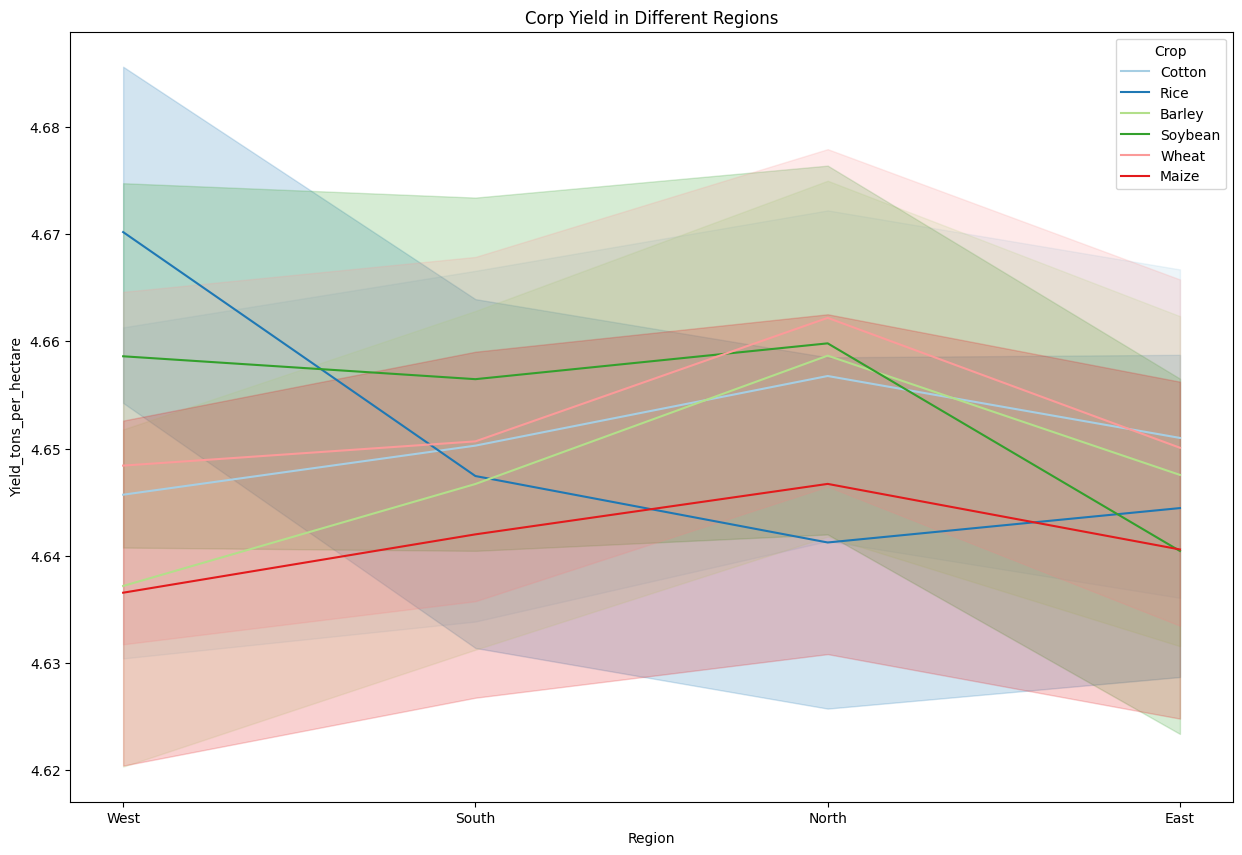

In [40]:
plt.figure(figsize=(15,10))
plt.title("Corp Yield in Different Regions")
sns.lineplot(x = df_copy['Region'],y = df_copy['Yield_tons_per_hectare'],hue=df_copy['Crop'],palette='Paired')

#Rice has Highest Yield in West and Lowest in North



<Axes: title={'center': 'Corp Yield in Different Weather Conditions'}, xlabel='Weather_Condition', ylabel='Yield_tons_per_hectare'>

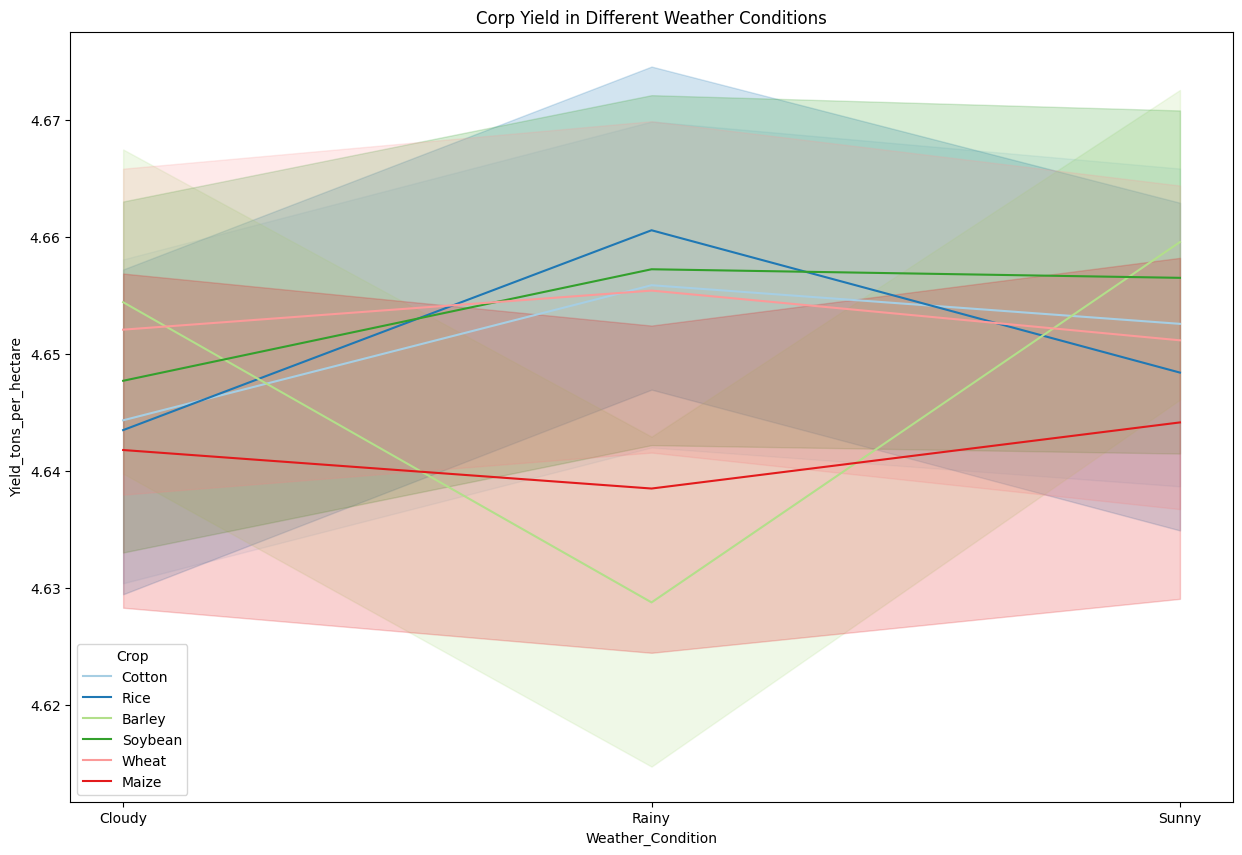

In [41]:
plt.figure(figsize=(15,10))
plt.title("Corp Yield in Different Weather Conditions")
sns.lineplot(x = df_copy['Weather_Condition'],y = df_copy['Yield_tons_per_hectare'],hue=df_copy['Crop'])
#Rain is Good for all except Barley
#Cloudy and Sunny has Same effect on all crops

<Axes: title={'center': 'Corp Yield in Different Soil Type'}, xlabel='Soil_Type', ylabel='Yield_tons_per_hectare'>

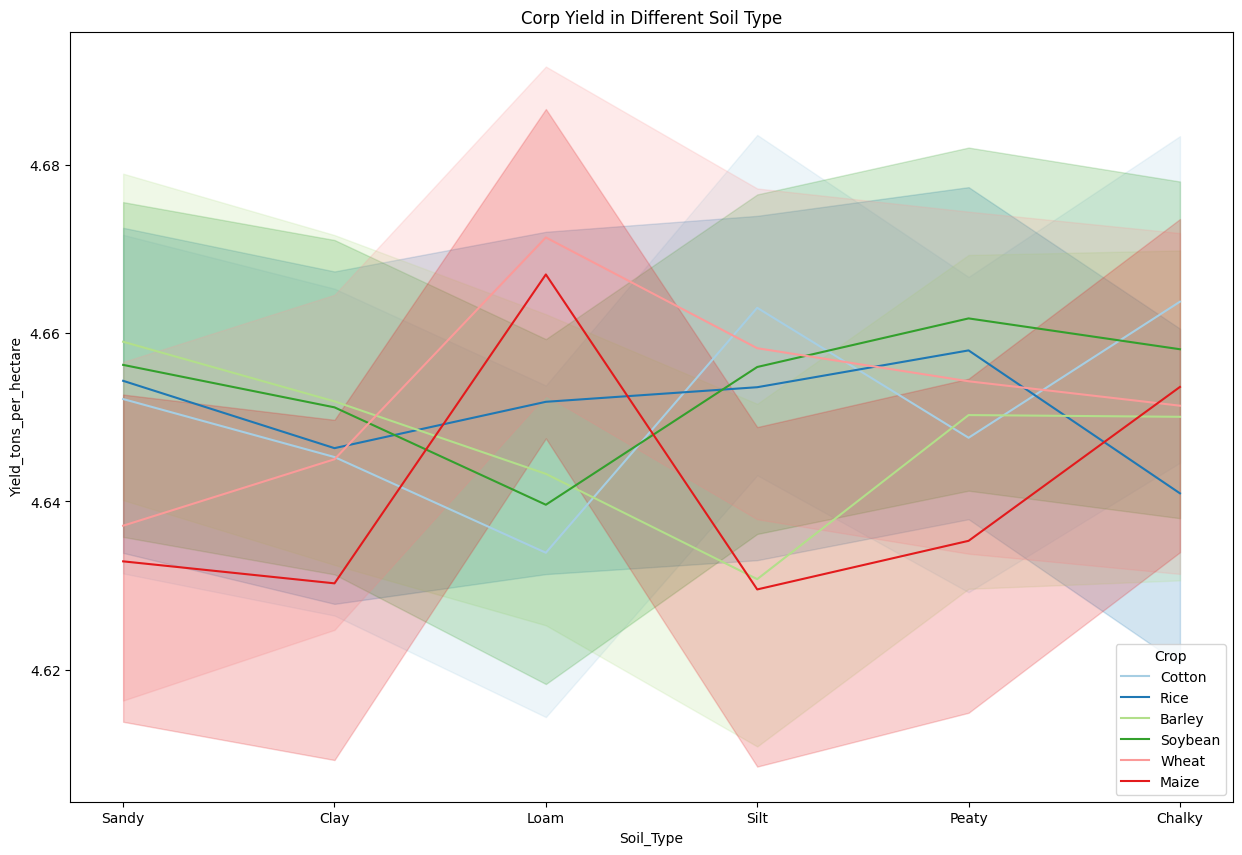

In [42]:
plt.figure(figsize=(15,10))
plt.title("Corp Yield in Different Soil Type")
sns.lineplot(x = df_copy['Soil_Type'],y = df_copy['Yield_tons_per_hectare'],hue=df_copy['Crop'])
#Sandy is Best Suitable for Barley,Soyabean and Average for Rice and Cotton and Bad for Wheat and Maize
#Clay is Average for Cotton,Rice,Barley,Soyabean and Wheat , and Bad for Maize
#Loam is Best Suited for Maize, Wheat and Average for Rice,Soyabean,Barley and Bad for Cotton
#Silt is Best Suited for Cotton,Soyabean,Rice ,Wheat and Bad for Maize and Barley
#Peaty is Best Suited for Soyabean,Rice and Average for Cotton,Barley,Wheat and Bad for Maize
#Chalky is Best Suited for Maize, Cotton ,Soyabean, Wheat, Barley and bad for Rice


<Axes: title={'center': 'Rainfall effects on Crop Yield'}, xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

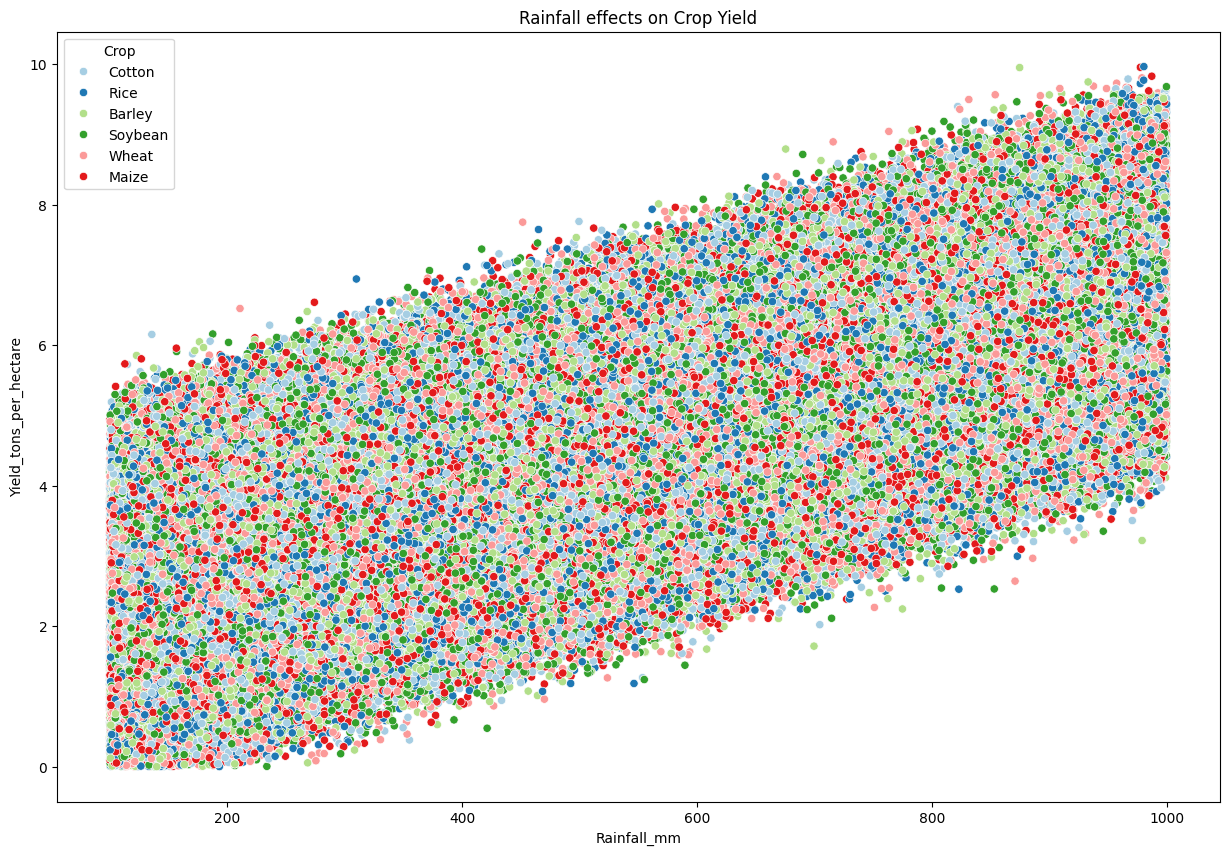

In [43]:
plt.figure(figsize=(15,10))
plt.title("Rainfall effects on Crop Yield")
sns.scatterplot(x = df_copy['Rainfall_mm'],y = df_copy['Yield_tons_per_hectare'],hue=df_copy['Crop'])
#High Rainfall lead to higher crop yield

<Axes: title={'center': 'Temperature effects on Crop Yield'}, xlabel='Temperature_Celsius', ylabel='Yield_tons_per_hectare'>

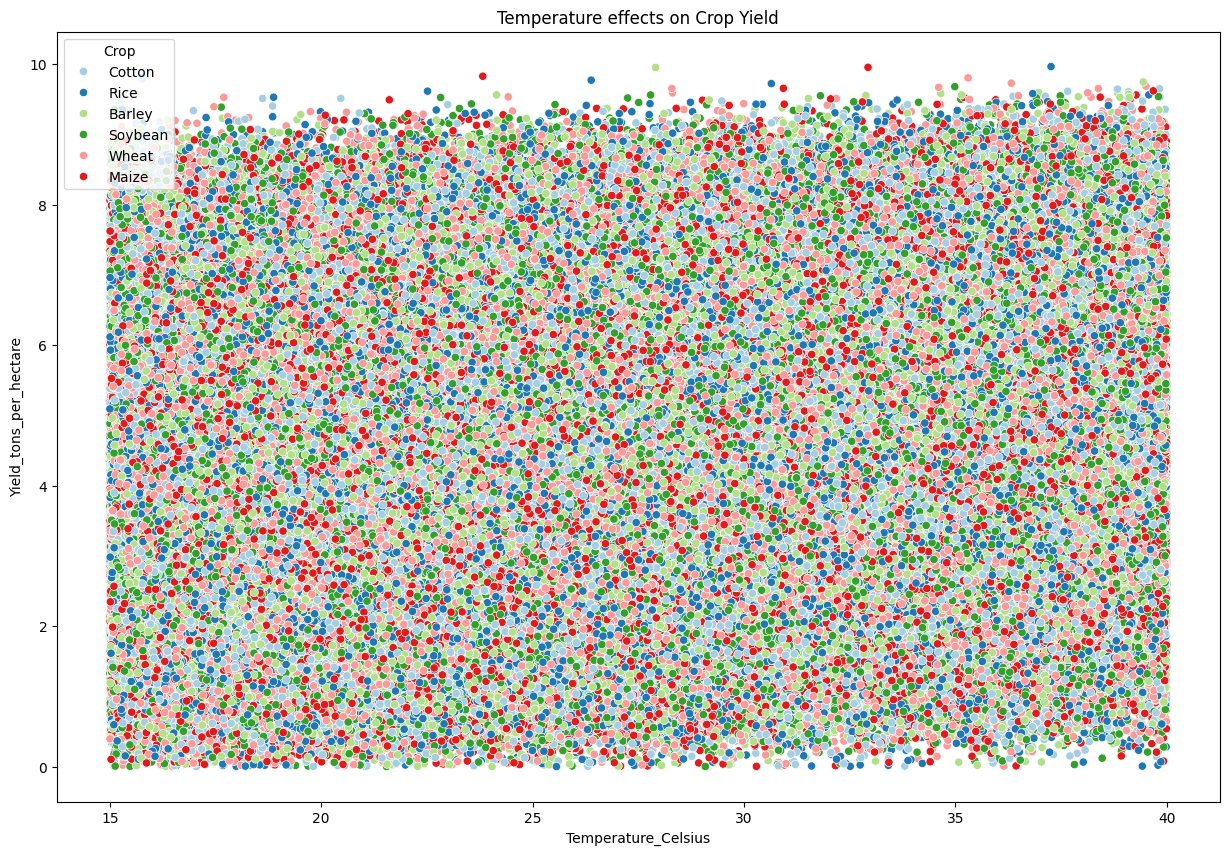

In [44]:
plt.figure(figsize=(15,10))
plt.title("Temperature effects on Crop Yield")
sns.scatterplot(x = df_copy['Temperature_Celsius'],y = df_copy['Yield_tons_per_hectare'],hue=df['Crop'])

<Axes: title={'center': 'Fertilization effects on Corp Yield'}, xlabel='Fertilizer_Used', ylabel='Yield_tons_per_hectare'>

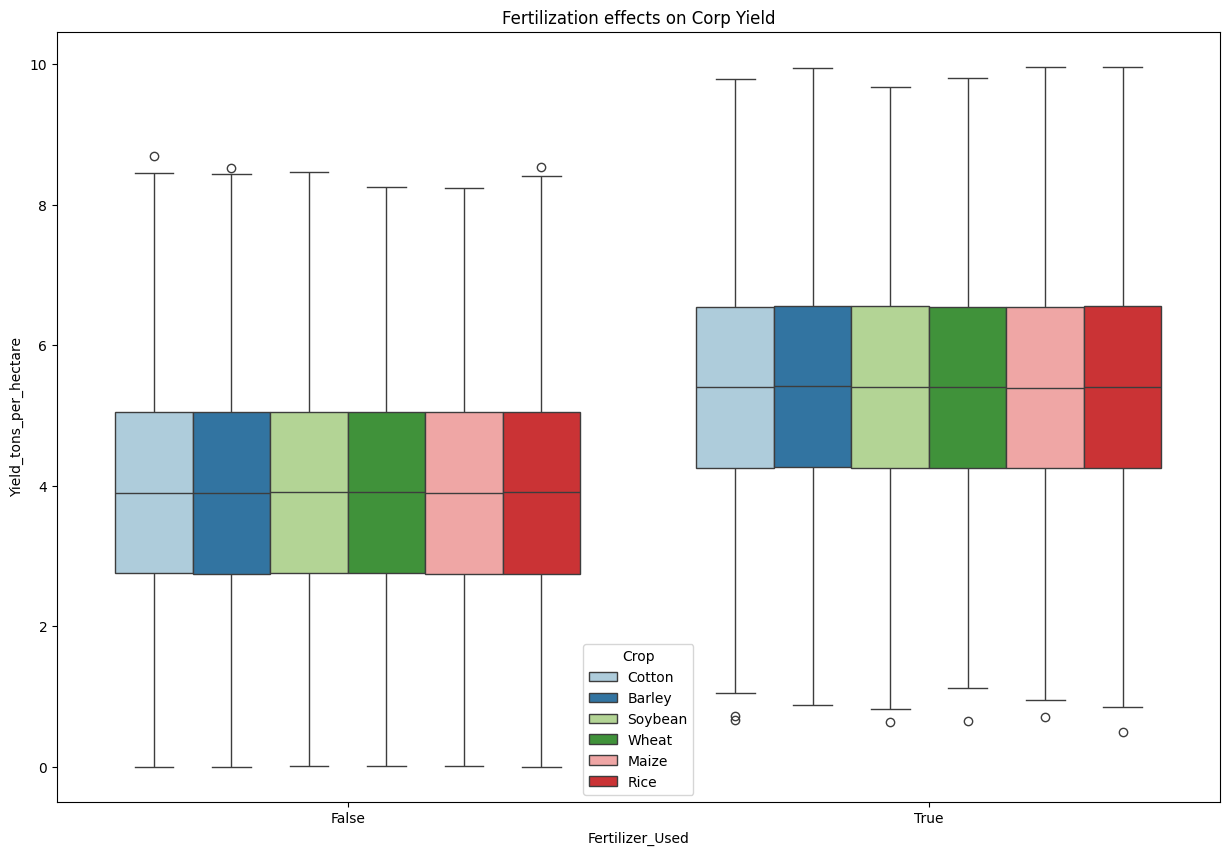

In [45]:
plt.figure(figsize=(15,10))
plt.title("Fertilization effects on Corp Yield")
sns.boxplot(x = df_copy['Fertilizer_Used'],y = df_copy['Yield_tons_per_hectare'],hue=df['Crop'])
#When Fertilizer is use , Crop Yield is More as compared to when Fertilization was not used

<Axes: title={'center': 'Irrigration effects on Corp Yield'}, xlabel='Irrigation_Used', ylabel='Yield_tons_per_hectare'>

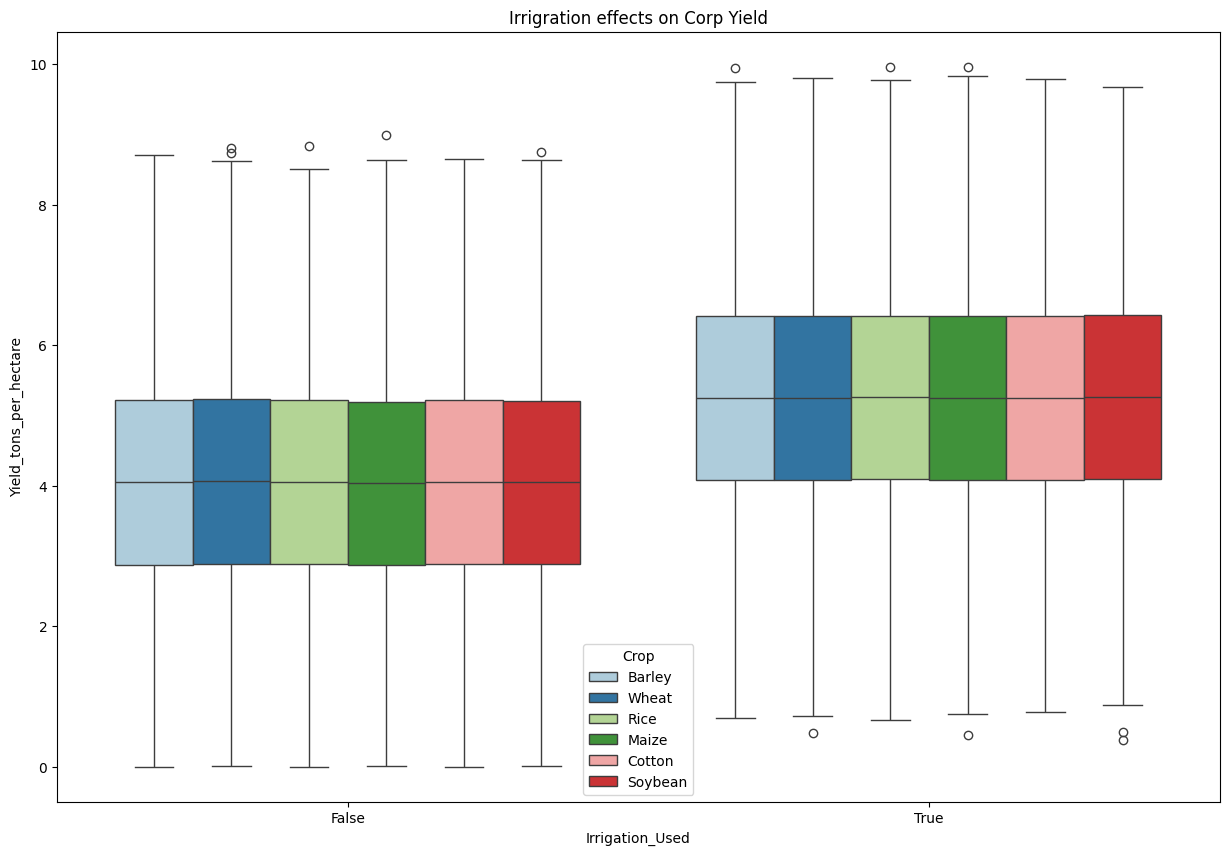

In [46]:
plt.figure(figsize=(15,10))
plt.title("Irrigration effects on Corp Yield")
sns.boxplot(x = df_copy['Irrigation_Used'],y = df_copy['Yield_tons_per_hectare'],hue=df['Crop'])
#When Irrigation is use , Crop Yield is More as compared to when Irrigation was not used

<Axes: title={'center': 'Irrigration and Fertilizer both are used, effects on Corp Yield'}, xlabel='Irrigation_Fertilization_Used', ylabel='Yield_tons_per_hectare'>

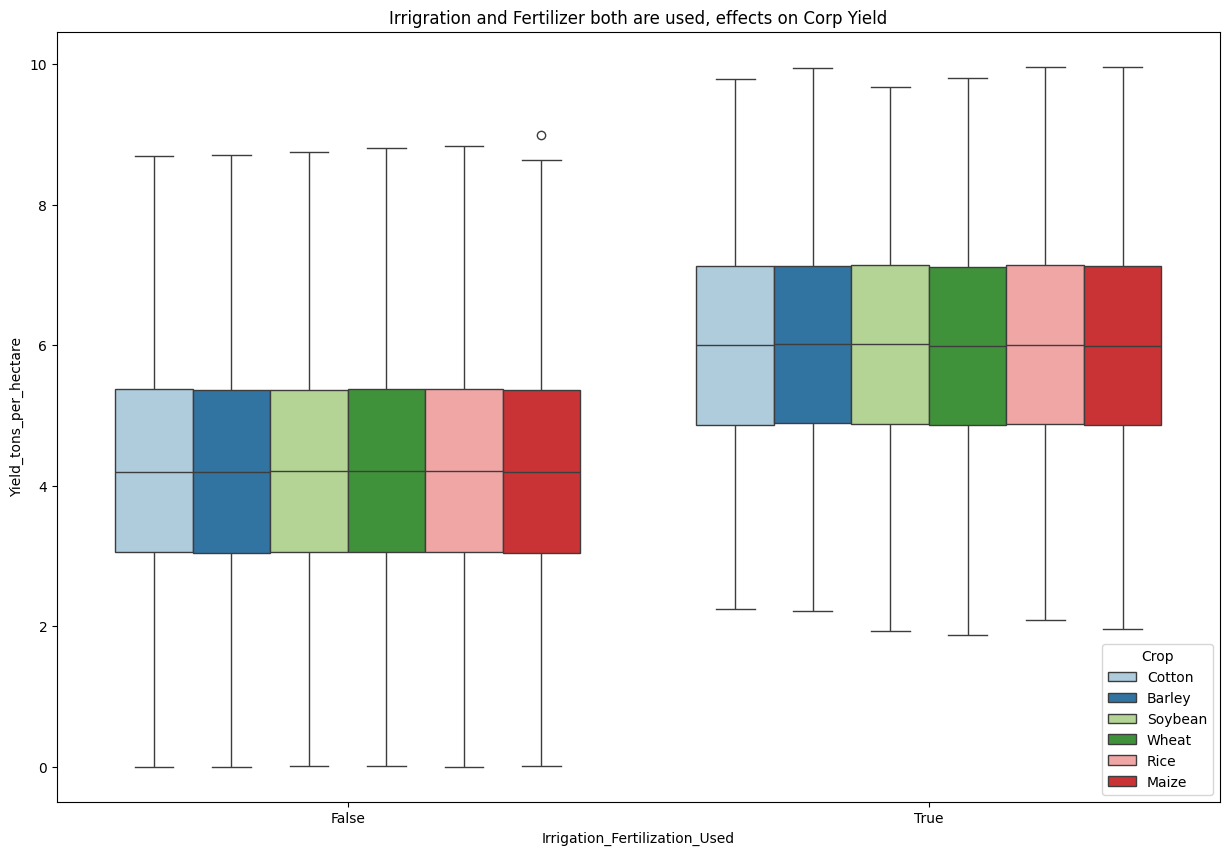

In [47]:
plt.figure(figsize=(15,10))
plt.title("Irrigration and Fertilizer both are used, effects on Corp Yield")
sns.boxplot(x = df_copy['Irrigation_Fertilization_Used'],y = df_copy['Yield_tons_per_hectare'],hue=df['Crop'])
#When Irrigation and Fertilization both are used ,Crop Yield is More as compared to when either Irrigation or Fertilization were used

<Axes: title={'center': "When Irrigration and Fertilizer both weren't used, effects on Corp Yield"}, xlabel='Irrigation_Fertilization_Both_Not_Used', ylabel='Yield_tons_per_hectare'>

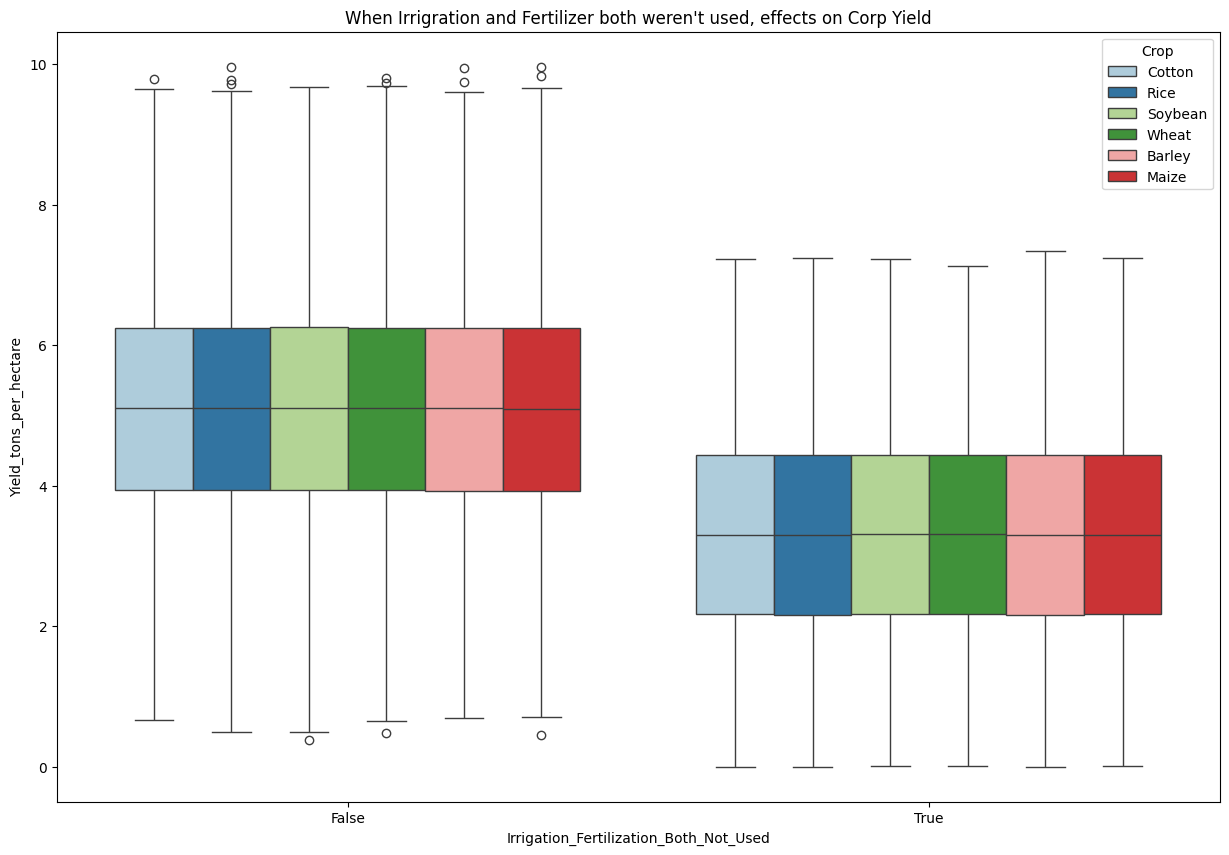

In [48]:
plt.figure(figsize=(15,10))
plt.title("When Irrigration and Fertilizer both weren't used, effects on Corp Yield")
sns.boxplot(x = df_copy['Irrigation_Fertilization_Both_Not_Used'],y = df_copy['Yield_tons_per_hectare'],hue=df['Crop'])
#When Irrigation and Fertilization both weren't used , Crop Yield is More as compared to when either Irrigation or Fertilization were used

<Axes: title={'center': 'Day to Harvest effects on Corp Yield'}, xlabel='Days_to_Harvest', ylabel='Density'>

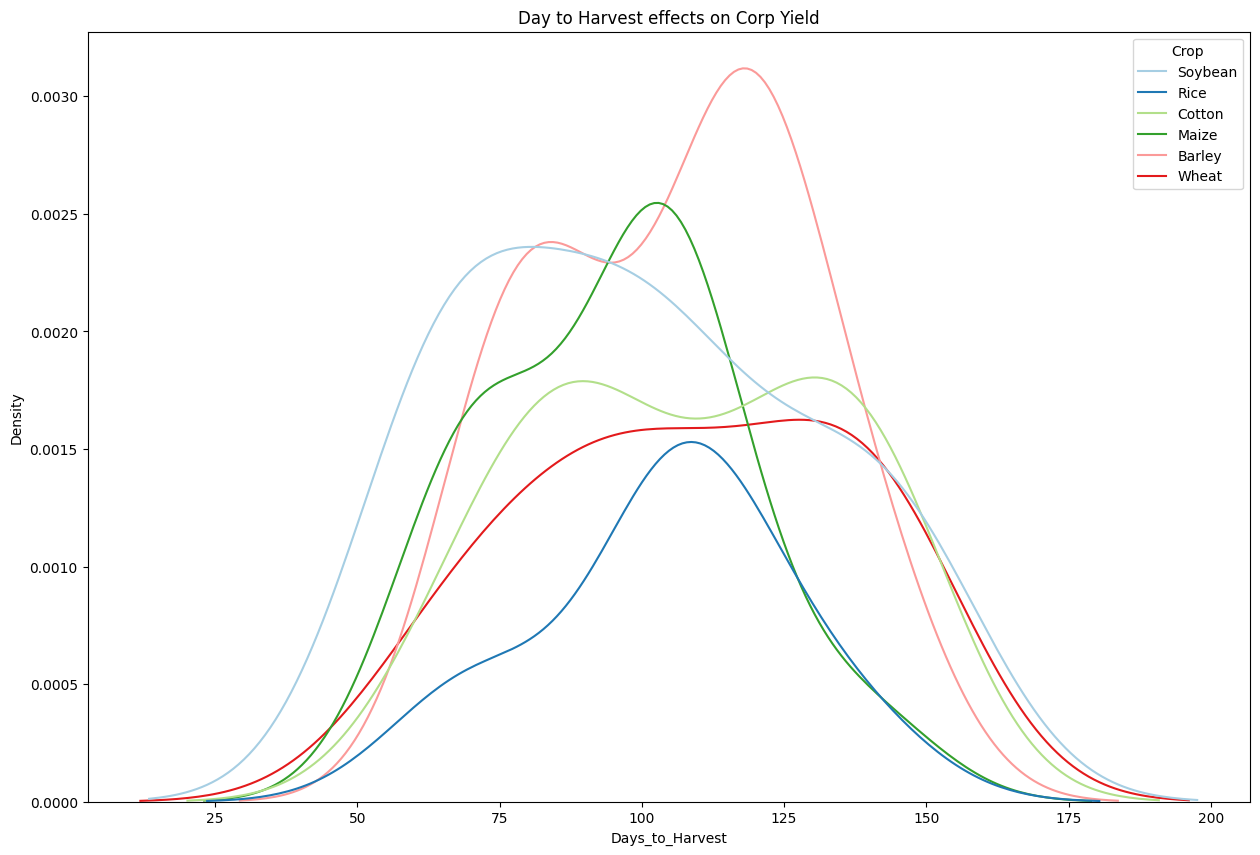

In [49]:
plt.figure(figsize=(15,10))
plt.title("Day to Harvest effects on Corp Yield")
sns.kdeplot(x=df_copy['Days_to_Harvest'].sample(10000),hue=df_copy['Crop'].sample(10000))

In [50]:
df_copy.head()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  ...  Crop_Maize  Crop_Rice  Crop_Soybean  \
0                6.555816  ...       False      False         False   
1                8.527341  ...       False       True         False   
2                1.127443  ...       False      False         False   
3                6.517573  ...       False      False          True   
4                7.248251  ...       False      False         False   

   Crop_Wheat  Weather_Condition_Cloudy  Weather_Condition_Rainy  \
0       False                      True                    False   
1       False                     False                     True   
2       False                     False                    False   
3       False                     False                     True   
4        True                      True                    False   

   Weather_Condition_Sunny  Irrigation_Fertilization_Used  \
0                    False                          False   
1                    False                           True   
2                     True                          False   
3                    False                          False   
4                    False                           True   

   Irrigation_Fertilization_Both_Not_Used  Irrigation_or_Fertilization_Used  
0                                   False                              True  
1                                   False                              True  
2                                    True                             False  
3                                   False                              True  
4                                   False                              True  

[5 rows x 32 columns]

In [51]:
#Dropping Features
df_copy.drop(['Region','Soil_Type','Crop','Weather_Condition','Irrigation_Fertilization_Used','Irrigation_Fertilization_Both_Not_Used','Irrigation_or_Fertilization_Used'],axis=1,inplace=True)

In [52]:
df_copy.to_csv('Data\Crop_Yield_Cleaned.csv',index=False)

NameError: name 'df_copy' is not defined